**Part0: imports and getting the data**

In [31]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [6]:
coordinates, labels = make_circles(n_samples=1500, noise=0.05)


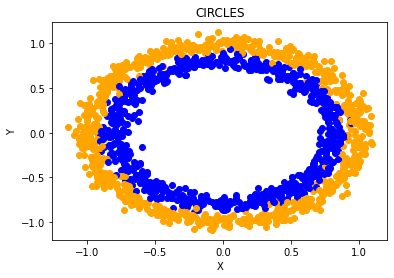

In [7]:
target_color = {0: 'orange', 1: 'blue'}
for i in range(len(coordinates)):
  plt.scatter(coordinates[i][0], coordinates[i][1], color = target_color[labels[i]])
  plt.title('CIRCLES')
  plt.xlabel('X')
  plt.ylabel('Y')

In [8]:
coordinates_train, coordinates_test, labels_train, labels_test = train_test_split(coordinates, labels, test_size=0.15)
print(f"data train shape: {coordinates_train.shape}, data test shape: {coordinates_test.shape}, labels train shape: {labels_train.shape}, labels test shape: {labels_test.shape}")

data train shape: (1275, 2), data test shape: (225, 2), labels train shape: (1275,), labels test shape: (225,)


**Part1: Neural network without activation function, use binary_crossentropy for loss function and use Adam optimizer (3 layer)**

In [ ]:
nn_without_activation = Sequential()
nn_without_activation.add(Dense(units=8, activation=None))
nn_without_activation.add(Dense(units=20, activation=None))
nn_without_activation.add(Dense(units=1, activation=None))
nn_without_activation.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_without_activation = nn_without_activation.fit(coordinates_train, labels_train, epochs=200, batch_size=10)

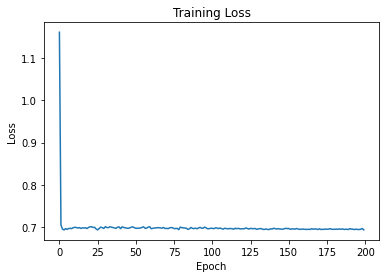

In [10]:
plt.plot(model_without_activation.epoch, model_without_activation.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

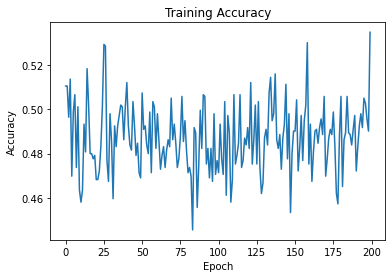

In [11]:
plt.plot(model_without_activation.epoch, model_without_activation.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [12]:
predict_nn_without_activation = nn_without_activation.predict(coordinates_test)
rounded = [round(x[0]) for x in predict_nn_without_activation]
correct_answer = 0
for i in range(len(labels_test)):
  if rounded[i] == labels_test[i]:
    correct_answer += 1

print('Accuracy in Test Set: ', correct_answer / len(labels_test))

Accuracy in Test Set:  0.44


در قسمت اول شبکه عصبی ساختیم که هیچ کدام از لایه‌های آن تابع فعال ساز ندارد. درنتیجه همانطور که در دو نمودار بالا مشاهده می‌کنید مدل ما داده‌ها را به صورت مناسب نتوانسته دسته‌بندی کند.
در نمودار تغییرات دقت مشاهده می‌شود که در طول ایپاک‌ها دقت کم و زیاد می‌شود و به صورت نویزی هست. دقت در داده‌های تست نیز 0.44 هست.

**Part2: Nueral network with linear activation function, use binary_crossentropy for loss function and use Adam optimizer (3layer)**

In [ ]:
nn_with_linear_activation = Sequential()
nn_with_linear_activation.add(Dense(units=8, activation='linear'))
nn_with_linear_activation.add(Dense(units=20, activation='linear'))
nn_with_linear_activation.add(Dense(units=1, activation='linear'))
nn_with_linear_activation.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_with_linear_activation = nn_with_linear_activation.fit(coordinates_train, labels_train, epochs=200, batch_size=10)

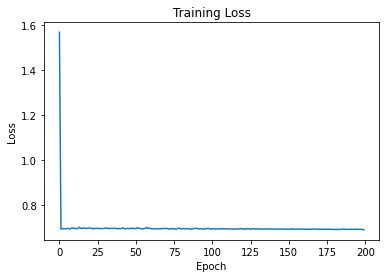

In [14]:
plt.plot(model_with_linear_activation.epoch, model_with_linear_activation.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

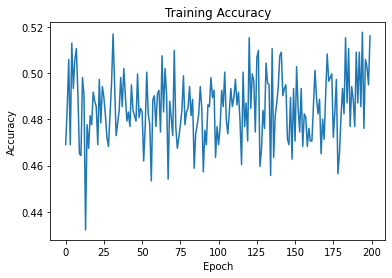

In [15]:
plt.plot(model_with_linear_activation.epoch, model_with_linear_activation.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [41]:
predict_nn_with_linear_activation = nn_with_linear_activation.predict(coordinates_test)
rounded = [round(x[0]) for x in predict_nn_with_linear_activation]
correct_answer = 0
for i in range(len(labels_test)):
  if rounded[i] == labels_test[i]:
    correct_answer += 1

print('Accuracy in Test Set: ', correct_answer / len(labels_test))

Accuracy in Test Set:  0.44


در قسمت دوم شبکه عصبی ساختیم که در لایه‌های آن از تابع فعال ساز خطی استفاده کردیم. درنتیجه همانطور که در دو نمودار بالا مشاهده می‌کنید مدل ما داده‌ها را به صورت مناسب نتوانسته دسته‌بندی کند. چون شبکه عصبی عمیق نداریم و شبکه ما مانند یک تابع خطی عمل می‌کند.
در نمودار دقت مشاهده می‌شود که در طول ایپاک‌ها دقت کم و زیاد می‌شود و به صورت نویزی هست. دقت در داده‌های تست نیز 0.44 هست.

**Part3: Nueral network with nonlinear activation function, use mean_squared_error for loss funcion and use Adam optimizer (3 layer)**

In [ ]:
nn_with_nonlinear_activation = Sequential()
nn_with_nonlinear_activation.add(Dense(units=8, activation='relu'))
nn_with_nonlinear_activation.add(Dense(units=20, activation='relu'))
nn_with_nonlinear_activation.add(Dense(units=1, activation='sigmoid'))
nn_with_nonlinear_activation.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_with_nonlinear_activation = nn_with_nonlinear_activation.fit(coordinates_train, labels_train, epochs=200, batch_size=10)

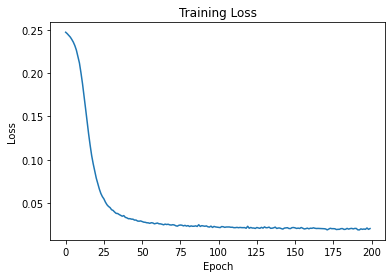

In [23]:
plt.plot(model_with_nonlinear_activation.epoch, model_with_nonlinear_activation.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

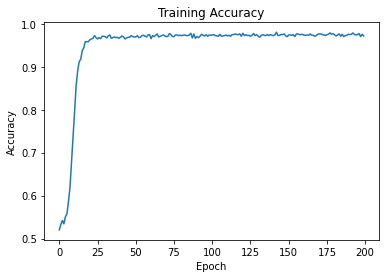

In [24]:
plt.plot(model_with_nonlinear_activation.epoch, model_with_nonlinear_activation.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [25]:
predict_nn_with_nonlinear_activation = nn_with_nonlinear_activation.predict(coordinates_test)
rounded = [round(x[0]) for x in predict_nn_with_nonlinear_activation]
correct_answer = 0
for i in range(len(labels_test)):
  if rounded[i] == labels_test[i]:
    correct_answer += 1

print('Accuracy in Test Set: ', correct_answer / len(labels_test))

Accuracy in Test Set:  0.96


در قسمت سوم شبکه عصبی ساختیم که در لایه‌های آن از تابع فعال ساز غیرخطی استفاده کردیم. (برای 2 لایه اول از رلو و برای لایه آخر از سیگموئید) درنتیجه همانطور که در دو نمودار بالا مشاهده می‌کنید مدل ما داده‌ها را به صورت مناسب توانسته دسته‌بندی کند. نسبت به دو حالت قبل  شبکه عصبی عمیق داریم و مدل ما توانسته به خوبی یاد بگیرد.
در نمودار تغییرات دقت مشاهده می‌شود که در طول ایپاک‌ها دقت بیش‌تر می‌شود و مانند دو حالت قبل به صورت نویزی نیست. دقت در داده‌های تست نیز 0.96 هست که قابل قبول هست.

**Part4: Nueral network with nonlinear activation function, use binary_crossentropy for loss funcion and use Adam optimizer (2layer)**

In [ ]:
nn_one_layer_with_nonlinear_activation = Sequential()
nn_one_layer_with_nonlinear_activation.add(Dense(units=8, activation='relu'))
nn_one_layer_with_nonlinear_activation.add(Dense(units=1, activation='sigmoid'))
nn_one_layer_with_nonlinear_activation.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_one_layer_with_nonlinear_activation = nn_one_layer_with_nonlinear_activation.fit(coordinates_train, labels_train, epochs=200, batch_size=10)

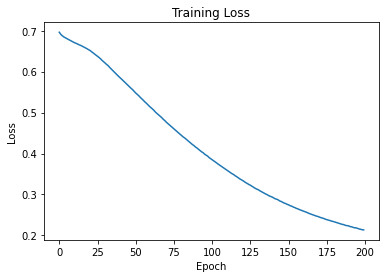

In [28]:
plt.plot(model_one_layer_with_nonlinear_activation.epoch, model_one_layer_with_nonlinear_activation.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

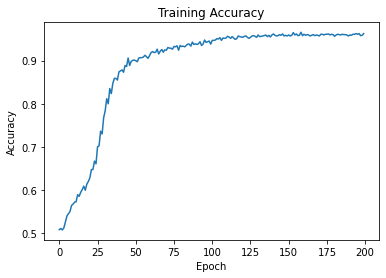

In [29]:
plt.plot(model_one_layer_with_nonlinear_activation.epoch, model_one_layer_with_nonlinear_activation.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [30]:
predict_nn_one_layer_with_nonlinear_activation = nn_one_layer_with_nonlinear_activation.predict(coordinates_test)
rounded = [round(x[0]) for x in predict_nn_one_layer_with_nonlinear_activation]
correct_answer = 0
for i in range(len(labels_test)):
  if rounded[i] == labels_test[i]:
    correct_answer += 1

print('Accuracy in Test Set: ', correct_answer / len(labels_test))

Accuracy in Test Set:  0.9422222222222222


در قسمت چهارم شبکه عصبی ساختیم که در لایه‌های آن از تابع فعال ساز غیرخطی استفاده کردیم. (برای لایه اول از رلو و برای لایه آخر از سیگموئید) درنتیجه همانطور که در دو نمودار بالا مشاهده می‌کنید مدل ما تقریبا داده‌ها را به صورت مناسب توانسته دسته‌بندی کند.
با مقایسه نمودار تغییر دقت در این قسمت و قسمت قبل متوجه می‌شویم که در قسمت سوم مدل زودتر به دقت بالا می‌رسد چون تعداد لایه‌های آن بیش‌تر است. هم چنین با مقایسه نمودار تغییرات خطا متوجه می‌شویم که در قسمت سوم نسبت به قسمت چهارم مدل زودتر خطای آن کاهش پیدا می‌کند.
دقت در داده‌های تست نیز 0.94 هست که قابل قبول هست.

**Part5: Nueral network with nonlinear activation function, use binary_crossentropy for loss funcion and use manual learning rate instead of Adams (3layer)**

In [32]:
my_optimizer = tf.keras.optimizers.Adam(0.001)
my_optimizer.learning_rate.assign(0.01)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.01>

In [ ]:
nn_with_nonlinear_activation_manual_rating_rate = Sequential()
nn_with_nonlinear_activation_manual_rating_rate.add(Dense(units=8, activation='relu'))
nn_with_nonlinear_activation_manual_rating_rate.add(Dense(units=20, activation='relu'))
nn_with_nonlinear_activation_manual_rating_rate.add(Dense(units=1, activation='sigmoid'))
nn_with_nonlinear_activation_manual_rating_rate.compile(loss='binary_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])
model_with_nonlinear_activation_manual_rating_rate = nn_with_nonlinear_activation_manual_rating_rate.fit(coordinates_train, labels_train, epochs=200, batch_size=10)

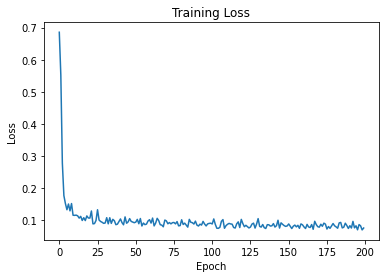

In [34]:
plt.plot(model_with_nonlinear_activation_manual_rating_rate.epoch, model_with_nonlinear_activation_manual_rating_rate.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

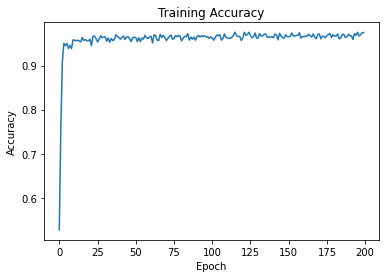

In [35]:
plt.plot(model_with_nonlinear_activation_manual_rating_rate.epoch, model_with_nonlinear_activation_manual_rating_rate.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [36]:
predict_nn_with_nonlinear_activation_manual_rating_rate = nn_with_nonlinear_activation_manual_rating_rate.predict(coordinates_test)
rounded = [round(x[0]) for x in predict_nn_with_nonlinear_activation_manual_rating_rate]
correct_answer = 0
for i in range(len(labels_test)):
  if rounded[i] == labels_test[i]:
    correct_answer += 1

print('Accuracy in Test Set: ', correct_answer / len(labels_test))

Accuracy in Test Set:  0.9244444444444444


در قسمت پنجم شبکه عصبی ساختیم که در لایه‌های آن از تابع فعال ساز غیرخطی استفاده کردیم. (برای دو لایه اول از رلو و برای لایه آخر از سیگموئید) درنتیجه همانطور که در دو نمودار بالا مشاهده می‌کنید مدل ما تقریبا داده‌ها را به صورت مناسب توانسته دسته‌بندی کند.
دقت در داده‌های تست نیز 0.92 هست که قابل قبول هست. ولی دقت در داده‌های تست در قسمت سوم و چهارم بیش‌تر بود چون از بهینه‌ساز آدام استفاده می‌کردیم ولی در این قسمت نرخ یادگیری را به صورت دستی مقدار 0.01 قرار دادیم.


**Part6: Nueral network with nonlinear activation function, use binary_crossentropy for loss funcion and use Adam optimizer (3layer)**

In [ ]:
best_nn_with_nonlinear_activation = Sequential()
best_nn_with_nonlinear_activation.add(Dense(units=8, activation='relu'))
best_nn_with_nonlinear_activation.add(Dense(units=20, activation='relu'))
best_nn_with_nonlinear_activation.add(Dense(units=1, activation='sigmoid'))
best_nn_with_nonlinear_activation.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model_with_nonlinear_activation = best_nn_with_nonlinear_activation.fit(coordinates_train, labels_train, epochs=200, batch_size=10)

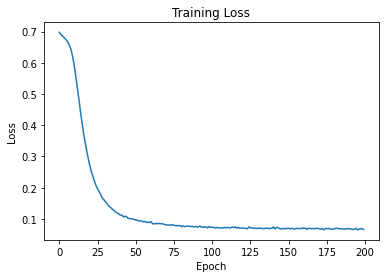

In [38]:
plt.plot(best_model_with_nonlinear_activation.epoch, best_model_with_nonlinear_activation.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

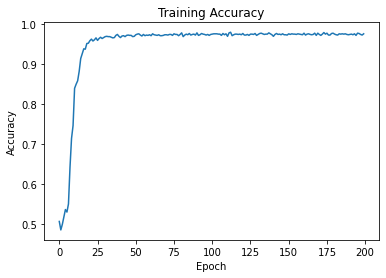

In [39]:
plt.plot(best_model_with_nonlinear_activation.epoch, best_model_with_nonlinear_activation.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [40]:
predict_best_nn_with_nonlinear_activation = best_nn_with_nonlinear_activation.predict(coordinates_test)
rounded = [round(x[0]) for x in predict_best_nn_with_nonlinear_activation]
correct_answer = 0
for i in range(len(labels_test)):
  if rounded[i] == labels_test[i]:
    correct_answer += 1

print('Accuracy in Test Set: ', correct_answer / len(labels_test))

Accuracy in Test Set:  0.96


در قسمت ششم شبکه عصبی ساختیم که در لایه‌های آن از تابع فعال ساز غیرخطی استفاده کردیم. (برای دو لایه اول از رلو و برای لایه آخر از سیگموئید) درنتیجه همانطور که در دو نمودار بالا مشاهده می‌کنید مدل ما تقریبا داده‌ها را به صورت مناسب توانسته دسته‌بندی کند.
در این قسمت از بهینه‌ساز آدام استفاده شده که سعی می‌کند بهترین نتیجه را بگیرد. دقت در داده‌های تست در این قسمت و قسمت سوم از بقیه بیش‌تر شده است که علت آن هم استفاده از بهینه‌ساز آدام و هم استفاده از شبکه عصبی 3 لایه‌ای است. (ولی تابع خطای این دو قسمت متفاوت است)
دقت در داده‌های تست نیز 0.96 هست که قابل قبول هست.